# Classification of qigong exercise using 1 IMU sensor

In [354]:
from datetime import datetime,time,timedelta
import pandas as pd
import numpy as np 

In [355]:
def float_comma(s):
    return float(s.replace(',', '.'))

In [356]:
def time_from_begin(s):
    #16:53:11.947
    t = datetime.fromisoformat(s)
    return t
    #return timedelta(hours=t.hour,
    #                 minutes = t.minute,
    #                seconds = t.second,
    #                milliseconds = t.millisecond)

Data reading from file to dataframe

In [357]:
file = 'data/1 sensor/initial data/Aikun_OK.txt'
#file = 'data/1 sensor/initial data/Aikun_nOK.txt'
#file = 'data/1 sensor/initial data/Vasya.txt'
#file = 'data/1 sensor/initial data/LYu.txt'
#file = 'data/1 sensor/initial data/NB.txt'

converters={'ay(g)':float_comma, 'ax(g)':float_comma, 'az(g)':float_comma, 
            'wx(deg/s)':float_comma, 'wy(deg/s)':float_comma, 'wz(deg/s)':float_comma,
           'ChipTime':time_from_begin}

df = pd.read_csv(file, sep='\t', skipinitialspace=True, skiprows=[0], 
                 converters=converters)

df['TimeFromStart'] = df['ChipTime'] - df['ChipTime'][0]
df

,address,Time(s),ChipTime,ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),AngleX(deg),AngleY(deg),AngleZ(deg),T(°),Voltage(v),hx,hy,hz,TimeFromStart
0,0x50,14:36:50.006,2023-03-28 13:40:47.346,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,"98,0859","-0,1483","-139,5209","34,00","3,96",-1781,3717,1402,0 days 00:00:00
1,0x50,14:36:50.006,2023-03-28 13:40:47.351,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,"98,0804","-0,1538","-139,5209","34,00","3,96",-1760,3717,1401,0 days 00:00:00.005000
2,0x50,14:36:50.006,2023-03-28 13:40:47.356,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,"98,0804","-0,1538","-139,5209","34,00","3,96",-1740,3716,1400,0 days 00:00:00.010000
3,0x50,14:36:50.006,2023-03-28 13:40:47.361,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,"98,0750","-0,1593","-139,5209","34,09","3,96",-1767,3715,1399,0 days 00:00:00.015000
4,0x50,14:36:50.006,2023-03-28 13:40:47.366,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,"98,0750","-0,1593","-139,5154","34,09","3,96",-1793,3716,1399,0 days 00:00:00.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50433,0x50,14:41:01.309,2023-03-28 13:44:59.921,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,"99,5746","-2,0544","-128,5620","36,34","3,96",-1906,3706,1373,0 days 00:04:12.575000
50434,0x50,14:41:01.309,2023-03-28 13:44:59.926,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,"99,5911","-2,0654","-128,4796","36,34","3,96",-1913,3703,1379,0 days 00:04:12.580000
50435,0x50,14:41:01.309,2023-03-28 13:44:59.931,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,"99,6075","-2,0709","-128,3972","36,34","3,96",-1919,3701,1385,0 days 00:04:12.585000
50436,0x50,14:41:01.309,2023-03-28 13:44:59.936,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,"99,6240","-2,0819","-128,3148","36,34","3,96",-1923,3701,1393,0 days 00:04:12.590000


In [358]:
def time_ind (ind):
    time = []
    for i in ind:
        time.append(df['TimeFromStart'][i].total_seconds())
    return time    

In [359]:
ind_right=range(11331,14925)

In [360]:
len(df['TimeFromStart'][ind_right]) == len(time_ind(ind_right))

True

Acceleration graph of one correctly performed exercise

<Figure size 640x480 with 0 Axes>

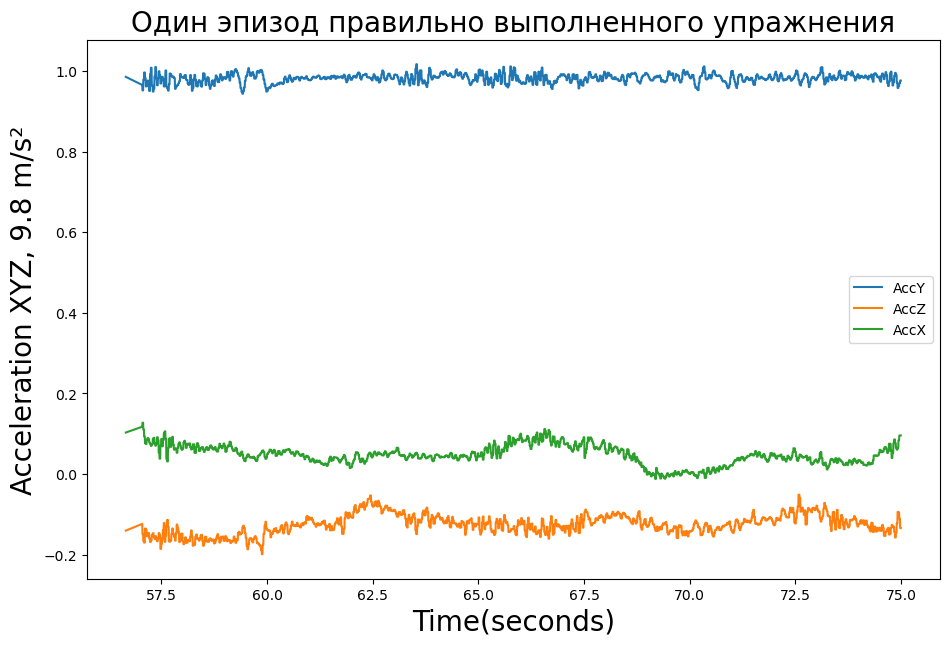

In [361]:
import matplotlib.pyplot as plt 
plt.figure()
plt.figure(figsize=(11,7))
plt.plot(time_ind(ind_right), df['ay(g)'][ind_right], label='AccY')
plt.plot(time_ind(ind_right), df['az(g)'][ind_right], label='AccZ')
plt.plot(time_ind(ind_right), df['ax(g)'][ind_right], label='AccX')
plt.xlabel('Time(seconds)', fontsize=20)
plt.ylabel('Acceleration XYZ, 9.8 m/s²', fontsize=20)
plt.title(r'Один эпизод правильно выполненного упражнения', fontsize=20)
plt.legend()

In [366]:
file_mark = 'data/1 sensor/initial data/Aikun_OK_mark.txt'
#file_mark = 'data/1 sensor/initial data/Aikun_nOK_mark.txt'
#file_mark = 'data/1 sensor/initial data/Vasya_mark.txt'
#file_mark = 'data/1 sensor/initial data/LYu_mark.txt'
#file_mark = 'data/1 sensor/initial data/NB_mark.txt'

df_mark = pd.read_csv(file_mark, sep='\t')
#df_mark = pd.read_csv(file_mark,sep='') for other files 

df_mark

,start(s),end(s),label
0,00:00:00,00:00:19,2.0
1,00:00:20,00:00:39,2.0
2,00:00:40,00:00:57,1.8
3,00:00:58,00:01:15,2.0
4,00:01:16,00:01:30,1.8
5,00:01:31,00:01:48,1.8
6,00:01:49,00:02:07,1.9
7,00:02:08,00:02:23,2.0
8,00:02:24,00:02:39,2.0
9,00:02:42,00:02:57,2.0


In [367]:
df = df[['ax(g)', 'ay(g)', 'az(g)', 'wx(deg/s)', 'wy(deg/s)', 'wz(deg/s)', 'TimeFromStart']]
df

,ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),TimeFromStart
0,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00
1,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00.005000
2,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00.010000
3,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,0 days 00:00:00.015000
4,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,0 days 00:00:00.020000
...,...,...,...,...,...,...,...
50433,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,0 days 00:04:12.575000
50434,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,0 days 00:04:12.580000
50435,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,0 days 00:04:12.585000
50436,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,0 days 00:04:12.590000


In [368]:
match = list(np.where(df['TimeFromStart']=='{0}'.format(df_mark.iloc[0,0])))
match

[array([0], dtype=int64)]

In [369]:
for i in range(0, df_mark.shape[0]):
    for j in range(0, 2):
        if i == 0 and j == 0:
            match = list(np.where(df['TimeFromStart']=='{0}'.format(df_mark.iloc[0,0]))[0])
            #match = [0]
            continue
    match.append((np.where(df['TimeFromStart']>'{0}'.format(df_mark.iloc[i, j])))[0][0] - 1)
    #match.append((np.where(df['TimeFromStart']<'{0}'.format(df_mark.iloc[i, j])))[0][-1])
    
for i in range(0, len(match)):
    print(match[i])
        

0
3800
7800
11331
14925
17925
21525
25324
28524
31724
35324
38324
41324
44924
47724


In [370]:
id = np.zeros(df.shape[0], dtype='int')
for i in range(0, len(match)-1):
    id[int(match[i]): int(match[i+1])] = i+1
df['id']=id
df

,ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),TimeFromStart,id
0,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00,1
1,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00.005000,1
2,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00.010000,1
3,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,0 days 00:00:00.015000,1
4,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,0 days 00:00:00.020000,1
...,...,...,...,...,...,...,...,...
50433,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,0 days 00:04:12.575000,0
50434,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,0 days 00:04:12.580000,0
50435,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,0 days 00:04:12.585000,0
50436,0.0186,0.9697,-0.1118,5.1270,19.0430,-0.9766,0 days 00:04:12.590000,0


In [371]:
time = np.zeros(df.shape[0], dtype='int')
for i in range(0, len(match)-1):
    time[int(match[i]): int(match[i+1])] = np.arange(0,int(match[i+1]) - int(match[i]),1)

df['time']=time
df = df.drop(df.index[int(match[len(match) - 1]):])
df

,ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),TimeFromStart,id,time
0,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00,1,0
1,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00.005000,1,1
2,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,0 days 00:00:00.010000,1,2
3,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,0 days 00:00:00.015000,1,3
4,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,0 days 00:00:00.020000,1,4
...,...,...,...,...,...,...,...,...,...
47719,0.0156,0.9893,-0.1074,4.0283,-0.7935,-1.7090,0 days 00:03:58.975000,14,2795
47720,0.0156,0.9893,-0.1074,4.0283,-0.7935,-1.7090,0 days 00:03:58.980000,14,2796
47721,0.0186,0.9927,-0.1152,3.9673,-1.7700,-1.4038,0 days 00:03:58.985000,14,2797
47722,0.0186,0.9927,-0.1152,3.9673,-1.7700,-1.4038,0 days 00:03:58.990000,14,2798


In [372]:
df = df.drop('TimeFromStart', axis=1)
df['person'] = 'Aikun'
df

,ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),id,time,person
0,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,1,0,Aikun
1,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,1,1,Aikun
2,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,1,2,Aikun
3,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,1,3,Aikun
4,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,1,4,Aikun
...,...,...,...,...,...,...,...,...,...
47719,0.0156,0.9893,-0.1074,4.0283,-0.7935,-1.7090,14,2795,Aikun
47720,0.0156,0.9893,-0.1074,4.0283,-0.7935,-1.7090,14,2796,Aikun
47721,0.0186,0.9927,-0.1152,3.9673,-1.7700,-1.4038,14,2797,Aikun
47722,0.0186,0.9927,-0.1152,3.9673,-1.7700,-1.4038,14,2798,Aikun


In [373]:
df.to_csv('data/1 sensor/processed data/Aikun_OK.txt', index=False)
df_mark['label'].to_csv('data/1 sensor/processed data/Aikun_OK_mark.txt', index=False)

In [374]:
file1 = 'data/1 sensor/processed data/Aikun_OK.txt'
df1 = pd.read_csv(file1, 
                  delimiter=',')
file2 = 'data/1 sensor/processed data/Aikun_nOK.txt'
df2 = pd.read_csv(file2, 
                  delimiter=',')
file3 = 'data/1 sensor/processed data/Vasya.txt'
df3 = pd.read_csv(file3,  
                  delimiter=',')
file4 = 'data/1 sensor/processed data/LYu.txt'
df4 = pd.read_csv(file4,  
                  delimiter=',')
file5 = 'data/1 sensor/processed data/NB.txt'
df5= pd.read_csv(file5, 
                  delimiter=',')

In [375]:
df_X = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_X

,ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),id,time,person
0,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,1,0,Aikun
1,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,1,1,Aikun
2,0.0269,0.9819,-0.1533,-0.5493,-1.8921,0.3052,1,2,Aikun
3,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,1,3,Aikun
4,0.0269,0.9824,-0.1538,-0.9155,-1.1597,0.3052,1,4,Aikun
...,...,...,...,...,...,...,...,...,...
275781,0.0332,0.9854,-0.0063,-0.0610,-1.0986,-0.7324,87,1595,NB
275782,0.0332,0.9854,-0.0063,-0.0610,-1.0986,-0.7324,87,1596,NB
275783,0.0332,0.9854,-0.0063,-0.0610,-1.0986,-0.7324,87,1597,NB
275784,0.0332,0.9873,-0.0015,-0.5493,-0.8545,-0.6714,87,1598,NB


In [376]:
df_y1 = pd.read_csv('data/1 sensor/processed data/Aikun_OK_mark.txt')
df_y2 = pd.read_csv('data/1 sensor/processed data/Aikun_nOK_mark.txt')
df_y3 = pd.read_csv('data/1 sensor/processed data/Vasya_mark.txt')
df_y4 = pd.read_csv('data/1 sensor/processed data/LYu_mark.txt')
df_y5 = pd.read_csv('data/1 sensor/processed data/NB_mark.txt')

In [377]:
df_y = pd.concat([df_y1, df_y2, df_y3, df_y4, df_y5], ignore_index=True)
df_y = df_y.round() / 2
df_y

,label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
82,0.0
83,0.0
84,0.0
85,0.0


In [378]:
df_X.to_csv('data/1 sensor/X.csv', index=False)
df_y.to_csv('data/1 sensor/y.csv', index=False)

In [379]:
df_X = df_X.drop('person', axis=1)

In [380]:
from tsfresh import extract_features
from tsfresh.feature_extraction import extract_features, MinimalFCParameters
X = extract_features(df_X, default_fc_parameters=MinimalFCParameters(), column_id='id', column_sort='time')

Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 20/20 [00:04<00:00,  4.23it/s]


In [381]:
len(X) == len(df_y)

True

In [382]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, df_y)

c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [383]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, df_y, test_size=0.33, random_state=42)

In [388]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy of SVM classifier: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print("Precision of SVM classifier: {:.3f}".format(metrics.precision_score(y_test, y_pred)))

print("Recall of SVM classifier: {:.3f}".format(metrics.recall_score(y_test, y_pred)))

c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVM classifier: 0.724
Precision of SVM classifier: 0.812
Recall of SVM classifier: 0.722


In [387]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Accuracy of knn classifier: {:.3f}".format(metrics.accuracy_score(y_test, knn.predict(X_test))))

print("Precision of knn classifier: {:.3f}".format(metrics.precision_score(y_test, knn.predict(X_test))))

print("Recall of knn classifier: {:.3f}".format(metrics.recall_score(y_test, knn.predict(X_test))))

Accuracy of knn classifier: 0.897
Precision of knn classifier: 0.895
Recall of knn classifier: 0.944


c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


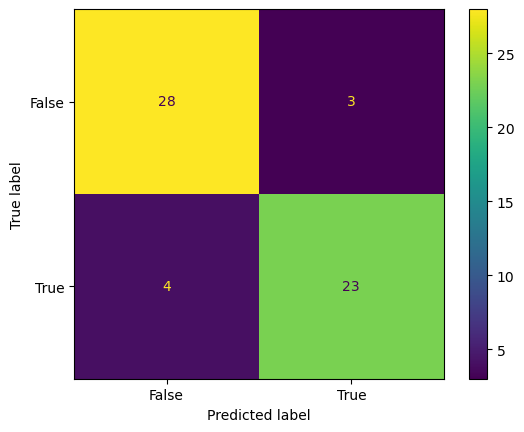

In [385]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, knn.predict(X_train))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

print("Accuracy of Logistic regression: {:.3f}".format(metrics.accuracy_score(y_test, logreg.predict(X_test))))

print("Precision of Logistic regression: {:.3f}".format(metrics.precision_score(y_test, logreg.predict(X_test))))

print("Recall of Logistic regression: {:.3f}".format(metrics.recall_score(y_test, logreg.predict(X_test))))

Accuracy of Logistic regression: 0.655
Precision of Logistic regression: 0.786
Recall of Logistic regression: 0.611


c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
